Exemplo Fuzzy

In [7]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

Base de Conhecimento

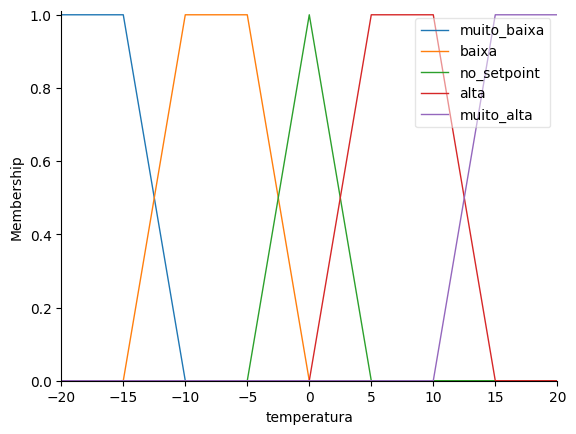

In [8]:
temperatura = ctrl.Antecedent(np.arange(-20, 21, 1), 'temperatura')

temperatura['muito_baixa'] = fuzz.trapmf(temperatura.universe, [-20, -20, -15, -10])
temperatura['baixa'] = fuzz.trapmf(temperatura.universe, [-15, -10, -5, 0])
temperatura['no_setpoint'] = fuzz.trimf(temperatura.universe, [-5, 0 , 5])
temperatura['alta'] = fuzz.trapmf(temperatura.universe, [0, 5, 10, 15])
temperatura['muito_alta'] = fuzz.trapmf(temperatura.universe, [10, 15, 20, 20])

temperatura.view()
plt.show()

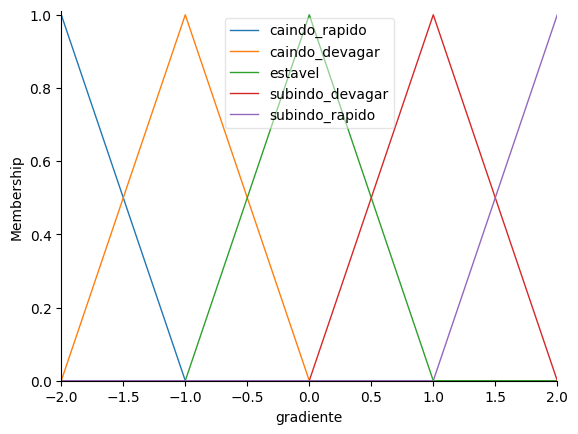

In [9]:
gradiente = ctrl.Antecedent(np.arange(-2, 3, 1), 'gradiente')
gradiente['caindo_rapido'] = fuzz.trimf(gradiente.universe, [-2, -2, -1])
gradiente['caindo_devagar'] = fuzz.trimf(gradiente.universe, [-2, -1 , 0])
gradiente['estavel'] = fuzz.trimf(gradiente.universe, [-1, 0, 1])
gradiente['subindo_devagar'] = fuzz.trimf(gradiente.universe, [0, 1, 2])
gradiente['subindo_rapido'] = fuzz.trimf(gradiente.universe, [1, 2, 2])

gradiente.view()
plt.show()

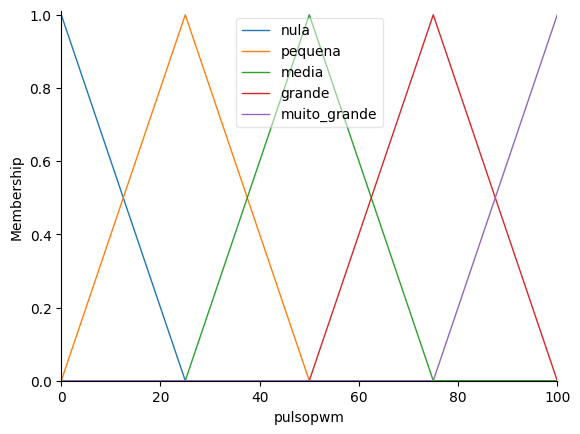

In [11]:
pulsopwm = ctrl.Consequent(np.arange(0, 101, 1), 'pulsopwm')
pulsopwm['nula'] = fuzz.trimf(pulsopwm.universe, [0, 0, 25])
pulsopwm['pequena'] = fuzz.trimf(pulsopwm.universe, [0, 25 , 50])
pulsopwm['media'] = fuzz.trimf(pulsopwm.universe, [25, 50, 75])
pulsopwm['grande'] = fuzz.trimf(pulsopwm.universe, [50, 75, 100])
pulsopwm['muito_grande'] = fuzz.trimf(pulsopwm.universe, [75,100, 100])

pulsopwm.view()
plt.show()

Regras Fuzzy

In [12]:
rule1 = ctrl.Rule(temperatura['baixa'] & gradiente['estavel'], pulsopwm['grande'])
rule2 = ctrl.Rule(temperatura['no_setpoint'] & gradiente['estavel'], pulsopwm['nula'])
rule3 = ctrl.Rule(temperatura['baixa'] & gradiente['subindo_devagar'], pulsopwm['media'])
rule4 = ctrl.Rule(temperatura['no_setpoint'] & gradiente['subindo_devagar'], pulsopwm['nula'])

#rule4.view()
#plt.show()

sistema de controle fuzzy

In [13]:
recomenda_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4])

In [14]:
recomenda = ctrl.ControlSystemSimulation(recomenda_ctrl)

In [15]:
# Pass inputs to the ControlSystem using Antecedent labels with Pythonic API
# Note: if you like passing many inputs all at once, use .inputs(dict_of_data)
recomenda.input['temperatura'] = 0
recomenda.input['gradiente'] = 0

# Crunch the numbers
recomenda.compute()

8.333333333333332


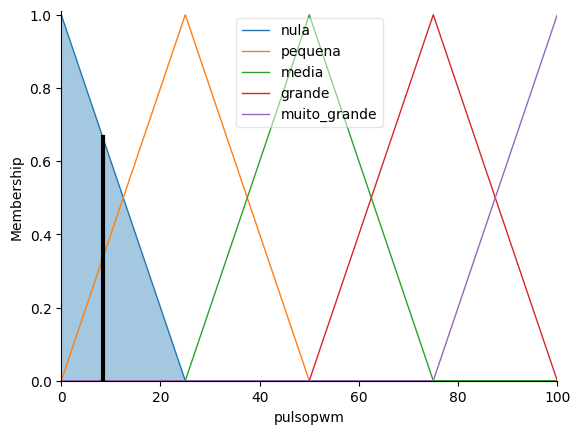

In [16]:
print(recomenda.output['pulsopwm'])
pulsopwm.view(sim=recomenda)
plt.show()